In [1]:
from google.colab import drive

!git clone https://github.com/federico2879/MLDL2024_semantic_segmentation.git

from MLDL2024_semantic_segmentation.datasets.importDataset import Download
Download('drive/MyDrive/Cityscapes.zip', '')

Cloning into 'MLDL2024_semantic_segmentation'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 135 (delta 9), reused 1 (delta 1), pack-reused 114
Receiving objects: 100% (135/135), 37.21 KiB | 5.31 MiB/s, done.
Resolving deltas: 100% (69/69), done.
Mounted at /content/drive
The zip file has been extracted correctly


In [2]:
from MLDL2024_semantic_segmentation.datasets.importDataset import Modified_CityScapes
Modified_CityScapes('Cityscapes/Cityspaces')

In [6]:
import torch
from torch.utils.data import DataLoader
from MLDL2024_semantic_segmentation.datasets.cityscapes import CityScapes
import torchvision.transforms as transforms

transformation = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

transf2 = transforms.Compose([
    transforms.Resize((224, 224)),  # Ridimensiona le maschere a 256x256
    transforms.ToTensor(),           # Converti in tensori
])


dataset_train = CityScapes('Cityscapes/Cityspaces', transform = transformation, label_transform = transf2)
dataloader_train = DataLoader(dataset_train, batch_size=10, shuffle=True)

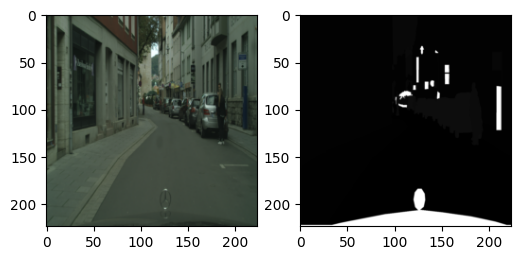

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def denormalize(image):
    image = image.to('cpu').numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = image * std + mean
    image = np.clip(image, 0, 1)
    return image

figure = plt.figure(figsize=(6, 3))
for i, (inputs, classes) in enumerate(dataloader_train):
    if i > 0:
        break
    figure.add_subplot(1,2,1)
    plt.imshow(denormalize(inputs[0].squeeze()), cmap="gray")
    figure.add_subplot(1,2,2)
    plt.imshow(classes[0].squeeze(), cmap="gray")